In [48]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

In [49]:
Data1 = pd.read_csv("prof_data.csv")
Data1.head(20)

/tmp/ipykernel_32647/2126630905.py:1: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  Data1 = pd.read_csv("prof_data.csv")


,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context
0,1,8,653.0,195.0,4324.0,1917829.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,50,659.0,198.0,4096.0,1917495.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,89,645.0,149.0,4054.0,1917365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,128,752.0,213.0,4090.0,1918146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,169,652.0,232.0,4088.0,1919319.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,209,582.0,210.0,4093.0,1920154.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,250,674.0,185.0,4116.0,1920713.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,289,664.0,197.0,4119.0,1921175.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,329,609.0,227.0,4108.0,1921156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,369,732.0,186.0,4161.0,1919864.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
Data1[Data1["ibiStatus"].notna()]

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context
16,1,611,NaN,NaN,NaN,NaN,90.0,691.0,1.0,0.0,NaN,NaN,NaN,NaN
41,1,1611,NaN,NaN,NaN,NaN,90.0,676.0,1.0,0.0,NaN,NaN,NaN,NaN
67,1,2612,NaN,NaN,NaN,NaN,89.0,665.0,1.0,0.0,NaN,NaN,NaN,NaN
93,1,3613,NaN,NaN,NaN,NaN,89.0,689.0,1.0,0.0,NaN,NaN,NaN,NaN
120,1,4618,NaN,NaN,NaN,NaN,89.0,689.0,1.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8824569,48,4221416,NaN,NaN,NaN,NaN,0.0,404.0,-10.0,0.0,NaN,NaN,NaN,NaN
8824595,48,4222416,NaN,NaN,NaN,NaN,0.0,213.0,-10.0,0.0,NaN,NaN,NaN,NaN
8824621,48,4223419,NaN,NaN,NaN,NaN,0.0,478.0,-10.0,0.0,NaN,NaN,NaN,NaN
8824647,48,4224422,NaN,NaN,NaN,NaN,0.0,0.0,-10.0,0.0,NaN,NaN,NaN,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

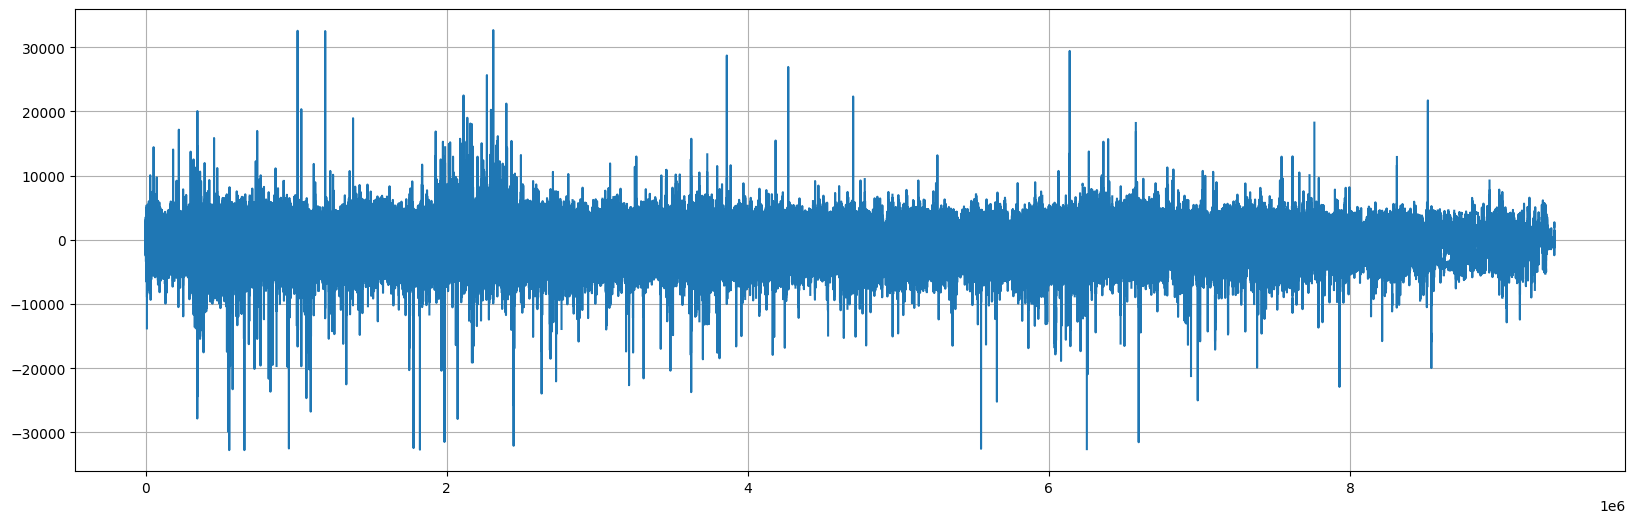

In [128]:
x = Data1["timestamp"]
y = Data1["x"]

plt.figure(figsize=(20,6))
plt.plot(x,y)
plt.grid()
plt.show()

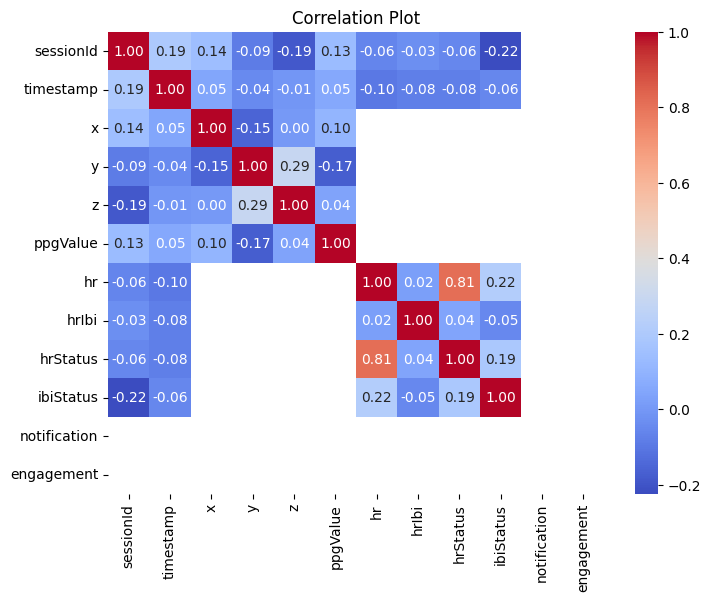

In [126]:
import seaborn as sns
correlation_matrix = Data1.drop(Data1.columns[-2:], axis=1).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')
plt.show()

In [125]:
Data1[:-2]

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context
0,1,8,653.0,195.0,4324.0,1917829.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,50,659.0,198.0,4096.0,1917495.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,89,645.0,149.0,4054.0,1917365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,128,752.0,213.0,4090.0,1918146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,169,652.0,232.0,4088.0,1919319.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8824671,48,4225375,-778.0,-129.0,4007.0,3379869.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8824672,48,4225415,-950.0,-146.0,3535.0,3360408.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8824673,48,4225425,NaN,NaN,NaN,NaN,0.0,0.0,-10.0,0.0,NaN,NaN,NaN,NaN
8824674,48,4225455,-808.0,42.0,4038.0,3349663.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
Data1.iloc[12872:13024]["affect"]

12872        NaN
12873        NaN
12874        NaN
12875        NaN
12876        NaN
          ...   
13019        NaN
13020        NaN
13021        NaN
13022        NaN
13023    RELAXED
Name: affect, Length: 152, dtype: object

In [75]:
len(Data1)

8824678

In [57]:
context = Data1["engagement"].notna()
Data1["engagement"][context].unique()

array([1.])

In [36]:
affect = Data1["affect"].notna()
Data1["affect"][affect].unique()

array(['RELAXED', 'HAPPY', 'ANGRY', 'SAD'], dtype=object)

In [37]:
Data1["sessionId"].unique()

array([ 1,  2,  3,  4,  6,  7,  8,  9, 10, 14, 15, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 49, 50, 51, 53, 54, 55, 56, 57, 58, 30, 11, 16,
       28, 48])

In [11]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8824678 entries, 0 to 8824677
Data columns (total 14 columns):
 #   Column        Dtype  
---  ------        -----  
 0   sessionId     int64  
 1   timestamp     int64  
 2   x             float64
 3   y             float64
 4   z             float64
 5   ppgValue      float64
 6   hr            float64
 7   hrIbi         float64
 8   hrStatus      float64
 9   ibiStatus     float64
 10  notification  float64
 11  engagement    float64
 12  affect        object 
 13  context       object 
dtypes: float64(10), int64(2), object(2)
memory usage: 942.6+ MB


In [50]:
Data1.dropna(inplace=False)

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context


In [129]:
data = Data1[Data1['ppgValue'].notna() & Data1['hr'].notna()]
data

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context


In [84]:
data[data["x"].notna()]

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context


In [77]:
data["affect"].unique()

array(['RELAXED', nan, 'HAPPY', 'ANGRY', 'SAD'], dtype=object)

In [46]:
data["sessionId"].unique()

array([ 1,  2,  3,  4,  6,  7,  8,  9, 10, 14, 15, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 49, 50, 51, 53, 54, 55, 56, 57, 58])

In [67]:
Data2 = pd.read_csv("SessionData-all.csv")
Data2.head()

,id,duration,watchId,age,gender,fairNumber
0,1,8021351,0Q3V,18-25,female,1
1,2,3752526,0Q3V,26-30,male,1
2,3,3989497,0QED,18-25,male,1
3,4,4979198,0QED,18-25,male,1
4,5,4836199,0QVM,18-25,male,1


In [69]:
Data2["id"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58])

In [39]:
Data2["id"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58])

In [70]:
Data3 = pd.read_csv("prof_skeleton.csv")
Data3.head()

,sessionId,timestamp,affect,context
0,1,1652042,True,False
1,1,1658301,False,True
2,1,5914412,True,False
3,1,5921368,False,True
4,2,629724,True,False


In [76]:
len(Data3)

261

In [74]:
Data3["sessionId"].unique()

array([ 1,  2,  3,  4,  6,  8,  9, 10, 14, 15, 17, 19, 20, 21, 22, 23, 24,
       25, 26, 27, 29, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 49, 50, 51, 53, 54, 55, 56, 57, 58, 30, 11, 16, 28, 48])